# CITE Project

## Objectives of the project:
- Forecast beef industry sales values for 2020
- Forecast beef prices for 2020

## Data sets used:
- Uncooked Beef Steaks, per lb (2010-2019) - Source: U.S. Bureau of Labor Statistics
- Per Capita Beef Consumption (2016-2019) - Source: USDA
- U.S. Population (2010-2019) - Srouce: Census Bureau



In [154]:
import scipy
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

In [155]:
# contains the beef prices by month
df = pd.read_excel('All Uncooked Beef Steaks, per lb (2010-2019).xlsx')
df.head()

,Year,1,2,3,4,5,6,7,8,9,10,11,12
0,2010,5.273,5.193,5.286,5.551,5.619,5.630,5.544,5.475,5.532,5.631,5.667,5.604
1,2011,5.693,5.728,5.796,5.980,5.964,5.833,5.844,5.948,6.022,6.048,6.011,6.044
2,2012,6.124,6.033,6.079,6.208,6.295,6.378,6.328,6.262,6.315,6.295,6.310,6.301
3,2013,6.408,6.363,6.267,6.232,6.369,6.422,6.425,6.340,6.399,6.363,6.326,6.344
4,2014,6.339,6.556,6.726,6.974,6.941,6.974,7.001,7.363,7.397,7.404,7.473,7.541


In [156]:
# transforming the data for simplicity
import datetime
date_price = []

for row in df.values:
    year = row[0]
    for ind in range(1, len(row)):
        date_price.append({
            'date': datetime.date(int(year), ind, 1),
            'price': row[ind],
            })
df_price = pd.DataFrame([x['price'] for x in date_price], index=[x['date'] for x in date_price], columns=['price'])
df_price.head()

,price
2010-01-01,5.273
2010-02-01,5.193
2010-03-01,5.286
2010-04-01,5.551
2010-05-01,5.619


In [157]:
df_price.index = pd.to_datetime(df_price.index)
df_price = df_price.resample(rule='M').last()
df_price.head()
df_2020 = df_price['2020']

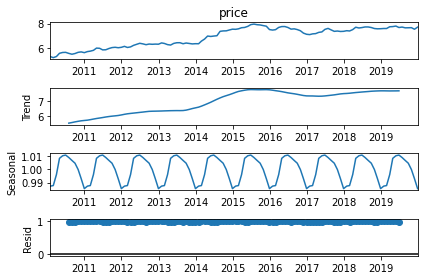

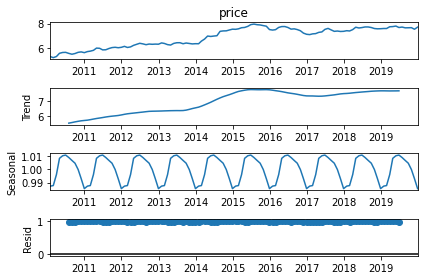

In [158]:
df_price.drop(df_price['2020'].index, inplace=True)
result = seasonal_decompose(df_price['price'], model='multiplicative')
result.plot()

As can be seen in the above charts the beef price is seasonal and tends to increase. 
Using adventage of the auto_arima library I will found the best model which fit to this data set.

In [159]:

from pmdarima import auto_arima 
  
import warnings 
warnings.filterwarnings("ignore") 
  
stepwise_fit = auto_arima(df_price['price'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True, 
                          stepwise = True)           
  

stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.61 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=101.742, Time=0.10 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-161.160, Time=0.65 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-1.900, Time=0.83 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=136.350, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-129.364, Time=0.12 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-171.645, Time=2.03 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.85 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.45 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=90.998, Time=0.61 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=-173.551, Time=4.01 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=-162.986, Time=0.89 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=5.02 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.57 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=-172.01

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  120
Model:             SARIMAX(1, 0, 1)x(2, 1, [], 12)   Log Likelihood                  92.886
Date:                             Tue, 01 Dec 2020   AIC                           -173.773
Time:                                     08:36:19   BIC                           -157.680
Sample:                                          0   HQIC                          -167.248
                                             - 120                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0214      0.020      1.079      0.280      -0.017       0.060
ar.L1          0.9605      0.030     31.684      0.000       0.901       1.020
ma.L1          0.2034      0.115      1.769      0.077      -0.022       0.429
ar.S.L12      -0.7375      0.121     -6.103      0.000      -0.974      -0.501
ar.S.L24      -0.3490      0.074     -4.705      0.000      -0.494      -0.204
sigma2         0.0096      0.001      9.555      0.000       0.008       0.012
===================================================================================
Ljung-Box (Q):                       40.19   Jarque-Bera (JB):                15.90
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               1.55   Skew:                             0.26
Prob(H) (two-sided):                  0.19   Kurtosis:                         4.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [160]:
train = df_price.iloc[:len(df_price)-12] 
test = df_price.iloc[len(df_price)-12:]

# Model:	SARIMAX(1, 0, 1)x(2, 1, [], 12)
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['price'],  
                order = (1, 0, 1),  
                seasonal_order =(2, 1, 0, 12)) 

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               price   No. Observations:                  108
Model:             SARIMAX(1, 0, 1)x(2, 1, [], 12)   Log Likelihood                  81.404
Date:                             Tue, 01 Dec 2020   AIC                           -152.807
Time:                                     08:36:21   BIC                           -139.985
Sample:                                 01-31-2010   HQIC                          -147.624
                                      - 12-31-2018                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9831      0.018     55.260      0.000       0.948       1.018
ma.L1          0.2596      0.114      2.279      0.023       0.036       0.483
ar.S.L12      -0.7390      0.122     -6.079      0.000      -0.977      -0.501
ar.S.L24      -0.3279      0.079     -4.131      0.000      -0.483      -0.172
sigma2         0.0097      0.001      9.048      0.000       0.008       0.012
===================================================================================
Ljung-Box (Q):                       49.96   Jarque-Bera (JB):                17.05
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               1.31   Skew:                             0.33
Prob(H) (two-sided):                  0.46   Kurtosis:                         4.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

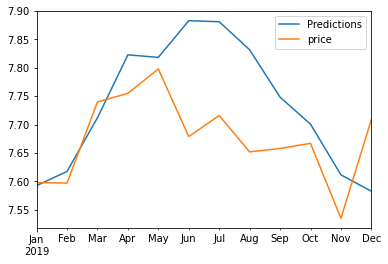

In [161]:
start = len(train) 
end = len(train) + len(test) - 1


predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predictions") 
  
# plot predictions and actual values
predictions.plot(legend = True) 
test['price'].plot(legend = True)

<AxesSubplot:>

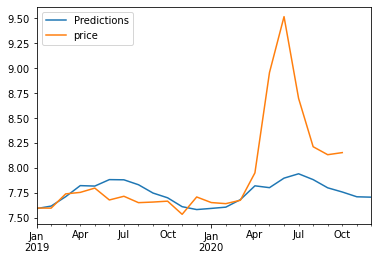

In [162]:
prices = test['price'].append(df_2020['price'])
predictions_2020 = result.predict(datetime.date(2019,1,31), datetime.date(2020,12,31), 
                             typ = 'levels').rename("Predictions") 

predictions_2020.plot(legend = True) 
prices.plot(legend = True)

As we can see in the above chart the year 2020 does not fit our model and that is because of the COVID-19 situation which increase the prices drastically.

In [163]:
# Evaluating the model
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 

# mean squared error
print('MSE: {}'.format(rmse(test["price"], predictions)))

# root mean squared error
print('RMSE: {}'.format(mean_squared_error(test["price"], predictions)))

MSE: 0.10747928273942924
RMSE: 0.011551796218182172


Our model works fine for with the test data set as we can see in the small values of the RMSE

MSE: 0.7018976630294325
RMSE: 0.49266032936617865


<AxesSubplot:title={'center':'2020 predictions'}>

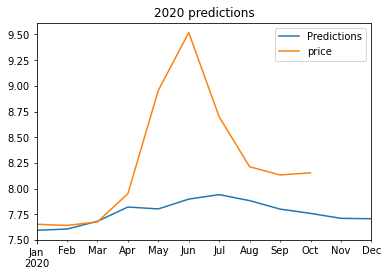

In [183]:
predictions_2020 = result.predict(datetime.date(2020,1,31), datetime.date(2020,12,31), 
                             typ = 'levels').rename("Predictions") 

# mean squared error
print('MSE: {}'.format(rmse(df_2020["price"][:10], predictions_2020[:10])))

# root mean squared error
print('RMSE: {}'.format(mean_squared_error(df_2020["price"][:10], predictions_2020[:10])))

plt.title('2020 predictions')
predictions_2020.plot(legend = True) 
df_2020["price"].plot(legend = True)

As we can see our model did not fit the real prices due to the increase of price because of the COVID-19, also if we compare the previous results for MSE and RMSE with these we can see that they increase meaning that our is not doing well.

## Now lets work with the population data set to forecast the 2020 population

<AxesSubplot:xlabel='Year'>

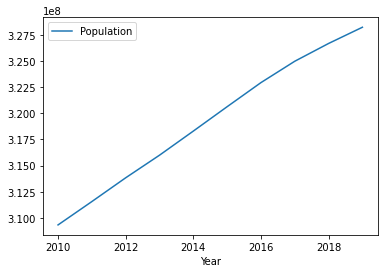

In [164]:

df_pop = pd.read_excel('Population (2010-2019).xlsx', header=0, index_col='Year')
df_pop['Population'].plot(legend=True)

The U.S. population grows in a linear way because of that I decided to use Linear Regression to forecast the population for 2020

In [165]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = np.array(df_pop.index).reshape((-1, 1))
y = np.array(df_pop['Population'])

In [166]:
pop_model = LinearRegression()
pop_model.fit(x, y)
print('Population Score: {}'.format(pop_model.score(x, y)))

Population Score: 0.9973069073800394


Text(0.5, 1.0, 'Population 2010-2019')

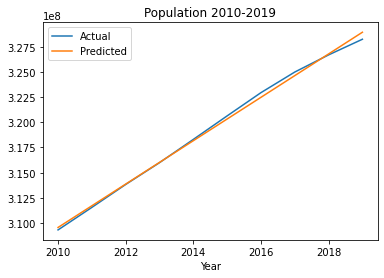

In [167]:
df_pop['Population'].plot(legend = True) 
y_pred = pop_model.predict(x)
plt.plot(df_pop.index, y_pred)
plt.legend(['Actual', 'Predicted'])
plt.title('Population 2010-2019')

## Per Capita Beef Consumption

In [168]:
df_cons = pd.read_excel("PerCapita Beef Pounds (2016-2019).xlsx", header=0, index_col='Year')
df_cons.head()

,Q1,Q2,Q3,Q4,Total
Year,,,,,
2016,36.0513,35.5504,36.0550,37.8104,145.4734
2017,36.4396,35.9431,36.9682,38.2356,147.5927
2018,36.5652,36.7591,36.9555,38.8462,149.1307
2019,37.2679,37.6234,37.6821,39.5140,152.0919


<AxesSubplot:xlabel='Year'>

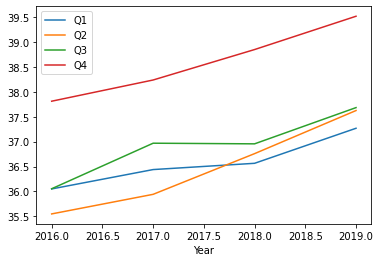

In [169]:
df_cons['Q1'].plot(legend=True)
df_cons['Q2'].plot(legend=True)
df_cons['Q3'].plot(legend=True)
df_cons['Q4'].plot(legend=True)

I will use linear regression to forecast the quater beef consumption

<AxesSubplot:xlabel='Year'>

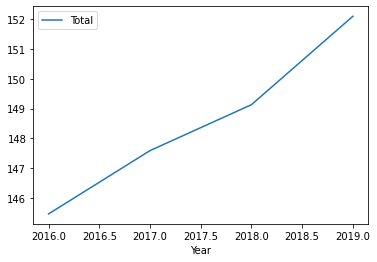

In [170]:
df_cons['Total'].plot(legend=True)

In [171]:
# Q1 model
q1_model = LinearRegression()
x_cons = np.array(df_cons.index).reshape(-1,1)
q1_y = np.array(df_cons['Q1'])
q1_model.fit(x_cons,q1_y)
print('Q1 model score: {}'.format(q1_model.score(x_cons, q1_y)))

Q1 model score: 0.9223782108833769


In [172]:
# Q2 model
q2_model = LinearRegression()
q2_y = np.array(df_cons['Q2'])
q2_model.fit(x_cons,q2_y)
print('Q2 model score: {}'.format(q2_model.score(x_cons, q2_y)))

Q2 model score: 0.9753141121475167


In [173]:
# Q3 model
q3_model = LinearRegression()
q3_y = np.array(df_cons['Q3'])
q3_model.fit(x_cons,q3_y)
print('Q3 model score: {}'.format(q3_model.score(x_cons, q3_y)))

Q3 model score: 0.8894198625072511


In [174]:
# Q4 model
q4_model = LinearRegression()
q4_y = np.array(df_cons['Q4'])
q4_model.fit(x_cons,q4_y)
print('Q4 model score: {}'.format(q4_model.score(x_cons, q4_y)))

Q4 model score: 0.9905974324141648


## Lets put everything together to see sales value in the U.S. quaterly in the U.S.

In [175]:
# 2020 predictions per capita consumption
q1_pred = q1_model.predict(np.array([2020]).reshape(-1,1))[0]
q2_pred = q2_model.predict(np.array([2020]).reshape(-1,1))[0]
q3_pred = q3_model.predict(np.array([2020]).reshape(-1,1))[0]
q4_pred = q4_model.predict(np.array([2020]).reshape(-1,1))[0]
cons_pred = np.array([q1_pred, q2_pred, q3_pred, q4_pred])

In [176]:
# 2020 population prediction
pop_pred = pop_model.predict(np.array([2020, 2020.25, 2020.5, 2020.75]).reshape(-1,1))

In [177]:
# 2020 price prediction
predictions_2020 = result.predict(datetime.date(2020,1,31), datetime.date(2020,12,31), 
                             typ = 'levels').rename("Predictions")
price_pred = np.array([predictions_2020.iloc[0:3].mean(), predictions_2020.iloc[3:6].mean(), predictions_2020.iloc[6:9].mean(), predictions_2020.iloc[9:12].mean()])

In [178]:
expected_sale_value = price_pred*pop_pred*cons_pred

In [179]:
print('2020 sale value per year quarter')
for i in range(4):
    print('Expected sale value for Q{}: ${:,.2f}'.format(i+1, expected_sale_value[i]))
print('Expected Sale Value for 2020: ${:,.2f}'.format(expected_sale_value.sum()))

2020 sale value per year quarter
Expected sale value for Q1: $94,766,961,616.88
Expected sale value for Q2: $99,394,821,127.66
Expected sale value for Q3: $99,748,465,095.91
Expected sale value for Q4: $102,894,304,891.87
Expected Sale Value for 2020: $396,804,552,732.32


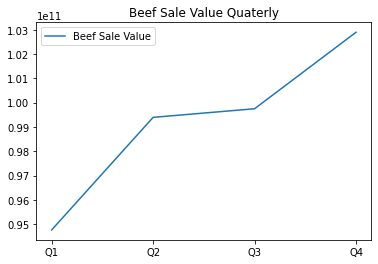

In [186]:
plt.plot(['Q1', 'Q2', 'Q3', 'Q4'], expected_sale_value)
plt.legend(['Beef Sale Value'])
plt.title('Beef Sale Value Quaterly')
plt.show()

## Conclusion
- The model for the prices did not fit due atypical situation
- The sale value tend to increase during the time
- The population tend to increase during the time
- The beef price behaves seasonally
- The 2nd and 3rd quater are similar in sale value